In [4]:
import yfinance as yf

In [5]:
# Downloading the data

tickers = ['SBIN.NS','TCS.NS','RELIANCE.NS','ITC.NS','^NSEI']
df = yf.download(tickers, start = '2020-01-01', end = '2024-12-31')['Close']
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Ticker,ITC.NS,RELIANCE.NS,SBIN.NS,TCS.NS,^NSEI
Date,,,,,
2020-01-01,186.567169,687.708984,308.602631,1983.748047,12182.500000
2020-01-02,187.938416,699.416870,313.077728,1974.641724,12282.200195
2020-01-03,186.880600,700.259644,307.910583,2013.993896,12226.650391
2020-01-06,184.216476,684.019043,294.346588,2013.811401,11993.049805
2020-01-07,184.412338,694.542419,293.792969,2018.753418,12052.950195
...,...,...,...,...,...
2024-12-23,458.433899,1222.300049,804.986267,4093.052979,23753.449219
2024-12-24,462.493835,1222.750000,796.065369,4113.920410,23727.650391
2024-12-26,461.043854,1216.550049,796.457520,4103.683594,23750.199219


In [6]:
# Perform Feature Engineering

# Considering yesterday's value

df['SBIN(t-1)'] = df['SBIN.NS'].shift(1)
df['TCS(t-1)'] = df['TCS.NS'].shift(1)
df['RELIANCE(t-1)'] = df['RELIANCE.NS'].shift(1)
df['ITC(t-1)'] = df['ITC.NS'].shift(1)
df['^NSEI(t-1)'] = df['^NSEI'].shift(1)
df

Ticker,ITC.NS,RELIANCE.NS,SBIN.NS,TCS.NS,^NSEI,SBIN(t-1),TCS(t-1),RELIANCE(t-1),ITC(t-1),^NSEI(t-1)
Date,,,,,,,,,,
2020-01-01,186.567169,687.708984,308.602631,1983.748047,12182.500000,NaN,NaN,NaN,NaN,NaN
2020-01-02,187.938416,699.416870,313.077728,1974.641724,12282.200195,308.602631,1983.748047,687.708984,186.567169,12182.500000
2020-01-03,186.880600,700.259644,307.910583,2013.993896,12226.650391,313.077728,1974.641724,699.416870,187.938416,12282.200195
2020-01-06,184.216476,684.019043,294.346588,2013.811401,11993.049805,307.910583,2013.993896,700.259644,186.880600,12226.650391
2020-01-07,184.412338,694.542419,293.792969,2018.753418,12052.950195,294.346588,2013.811401,684.019043,184.216476,11993.049805
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,458.433899,1222.300049,804.986267,4093.052979,23753.449219,796.016357,4104.864746,1205.300049,449.154053,23587.500000
2024-12-24,462.493835,1222.750000,796.065369,4113.920410,23727.650391,804.986267,4093.052979,1222.300049,458.433899,23753.449219
2024-12-26,461.043854,1216.550049,796.457520,4103.683594,23750.199219,796.065369,4113.920410,1222.750000,462.493835,23727.650391


In [7]:
# Moving Average

df['TCS_MA_5'] = df['TCS.NS'].rolling(window = 5).mean()
df['RELIANCE_MA_5'] = df['RELIANCE.NS'].rolling(window = 5).mean()
df['SBIN_MA_5'] = df['SBIN.NS'].rolling(window = 5).mean()
df['ITC_MA_5'] = df['ITC.NS'].rolling(window = 5).mean()
df['NSEI_MA_5'] = df['^NSEI'].rolling(window = 5).mean()
df

Ticker,ITC.NS,RELIANCE.NS,SBIN.NS,TCS.NS,^NSEI,SBIN(t-1),TCS(t-1),RELIANCE(t-1),ITC(t-1),^NSEI(t-1),TCS_MA_5,RELIANCE_MA_5,SBIN_MA_5,ITC_MA_5,NSEI_MA_5
Date,,,,,,,,,,,,,,,
2020-01-01,186.567169,687.708984,308.602631,1983.748047,12182.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,187.938416,699.416870,313.077728,1974.641724,12282.200195,308.602631,1983.748047,687.708984,186.567169,12182.500000,NaN,NaN,NaN,NaN,NaN
2020-01-03,186.880600,700.259644,307.910583,2013.993896,12226.650391,313.077728,1974.641724,699.416870,187.938416,12282.200195,NaN,NaN,NaN,NaN,NaN
2020-01-06,184.216476,684.019043,294.346588,2013.811401,11993.049805,307.910583,2013.993896,700.259644,186.880600,12226.650391,NaN,NaN,NaN,NaN,NaN
2020-01-07,184.412338,694.542419,293.792969,2018.753418,12052.950195,294.346588,2013.811401,684.019043,184.216476,11993.049805,2000.989697,693.189392,303.546100,186.003000,12147.470117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,458.433899,1222.300049,804.986267,4093.052979,23753.449219,796.016357,4104.864746,1205.300049,449.154053,23587.500000,4188.599951,1231.320020,814.573718,453.455640,23965.499609
2024-12-24,462.493835,1222.750000,796.065369,4113.920410,23727.650391,804.986267,4093.052979,1222.300049,458.433899,23753.449219,4159.267529,1226.810010,807.025293,455.176282,23843.829688
2024-12-26,461.043854,1216.550049,796.457520,4103.683594,23750.199219,796.065369,4113.920410,1222.750000,462.493835,23727.650391,4124.078467,1219.470020,801.986475,456.423260,23754.099609


In [8]:
# Set Y Variable - Next Day
df['Target'] = df['SBIN.NS'].shift(-1)

df = df.dropna()

In [9]:
df.columns

Index(['ITC.NS', 'RELIANCE.NS', 'SBIN.NS', 'TCS.NS', '^NSEI', 'SBIN(t-1)',
       'TCS(t-1)', 'RELIANCE(t-1)', 'ITC(t-1)', '^NSEI(t-1)', 'TCS_MA_5',
       'RELIANCE_MA_5', 'SBIN_MA_5', 'ITC_MA_5', 'NSEI_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [10]:
import statsmodels.api as sm

X = df[['TCS(t-1)',
       'RELIANCE(t-1)', 'SBIN(t-1)', 'ITC(t-1)', '^NSEI(t-1)', 'TCS_MA_5',
       'RELIANCE_MA_5', 'SBIN_MA_5', 'ITC_MA_5', 'NSEI_MA_5']]
Y = df['Target']

X_const = sm.add_constant(X) # Intercept term

model = sm.OLS(Y,X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.090e+04
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:34:24   Log-Likelihood:                -4798.6
No. Observations:                1227   AIC:                             9619.
Df Residuals:                    1216   BIC:                             9675.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.9907      3.084     -4.212      0.000     -19.041      -6.940
TCS(t-1)         -0.0081      0.012     -0.660      0.509      -0.032       0.016
RELIANCE(t-1)    -0.0556      0.034     -1.638      0.102      -0.122       0.011
SBIN(t-1)         0.4603      0.068      6.776      0.000       0.327       0.594
ITC(t-1)         -0.1359      0.129     -1.049      0.294      -0.390       0.118
^NSEI(t-1)        0.0132      0.005      2.538      0.011       0.003       0.023
TCS_MA_5          0.0067      0.013      0.529      0.597      -0.018       0.031
RELIANCE_MA_5     0.0645      0.034      1.884      0.060      -0.003       0.132
SBIN_MA_5         0.5015      0.069      7.305      0.000       0.367       0.636
ITC_MA_5          0.1386      0.130      1.063      0.288      -0.117       0.394
NSEI_MA_5        -0.0117      0.005     -2.203      0.028      -0.022      -0.001
==============================================================================
Omnibus:                      142.080   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1261.691
Skew:                          -0.050   Prob(JB):                    1.07e-274
Kurtosis:                       7.967   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# If p value < 0.05 : Keep that variable, its significant
# If p values > 0.05: Remove that variable, its not significant

In [12]:
X1 = df['^NSEI(t-1)']
Y1 = df['Target']

X1_const = sm.add_constant(X1)

model = sm.OLS(Y1,X1_const).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 2.419e+04
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:34:24   Log-Likelihood:                -6337.9
No. Observations:                1227   AIC:                         1.268e+04
Df Residuals:                    1225   BIC:                         1.269e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -301.4691      5.172    -58.291      0.000    -311.616    -291.323
^NSEI(t-1)     0.0451      0.000    155.543      0.000       0.045       0.046
==============================================================================
Omnibus:                       12.982   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.456
Skew:                           0.143   Prob(JB):                      0.00536
Kurtosis:                       2.650   Cond. No.                     7.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
import pandas as pd

df_train_predict = pd.DataFrame()
df_train_predict['Actual'] = df['Target']
df_train_predict['Predicted'] = model.predict(X1_const)
df_train_predict

,Actual,Predicted
Date,,
2020-01-07,295.084778,239.082303
2020-01-08,304.681030,241.782136
2020-01-09,306.572571,240.538121
2020-01-10,305.188507,249.126637
2020-01-13,302.651093,250.970057
...,...,...
2024-12-20,804.986267,778.083216
2024-12-23,796.065369,761.668009
2024-12-24,796.457520,769.147681


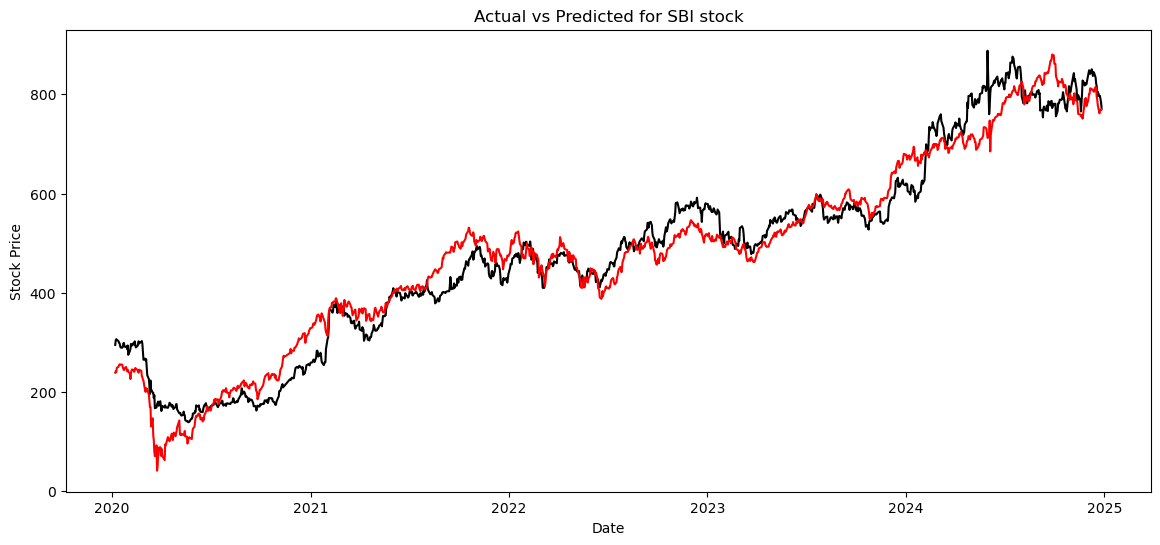

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))
plt.plot(df_train_predict.index, df_train_predict['Actual'], label = 'Actual', color = 'black')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Predicted for SBI stock")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

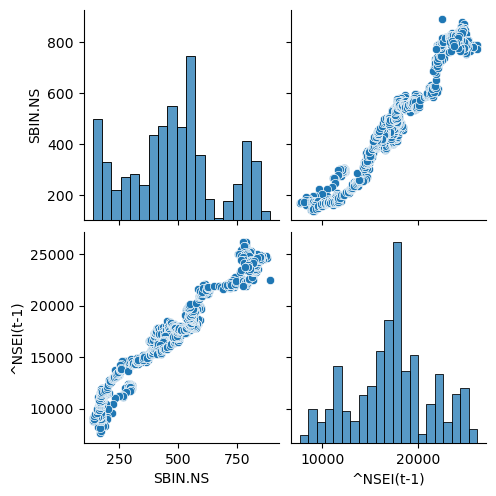

In [15]:
# Assumption1 : Linear relation between dependent and independent variable

import seaborn as sns
df = df[['SBIN.NS','^NSEI(t-1)']]
sns.pairplot(df)

In [16]:
# SBI and SBI(t-1) has linear relationship
# SBI and SBI_MA_5 has linear relationship
# SBI and NSEI(t-1) has linear relationship

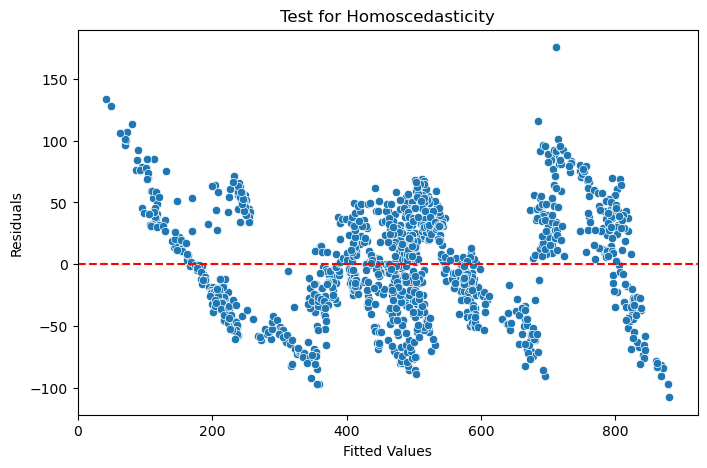

In [17]:
# Assumption 2: Homoscedacticity

residual = model.resid
fitted = model.fittedvalues

plt.figure(figsize = (8,5))
sns.scatterplot(x = fitted, y = residual)
plt.axhline(0, color = 'red', linestyle = '--')
plt.title("Test for Homoscedasticity")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [18]:
# Since it is a tube like structure, hence it is a homoscedaticity

In [19]:
# Assumption 3: Multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X1_const.columns
vif['VIF'] = [variance_inflation_factor(X1_const.values, i) for i in range(X1_const.shape[1])]
vif = vif[1:]
vif

,Features,VIF
1,^NSEI(t-1),1.0


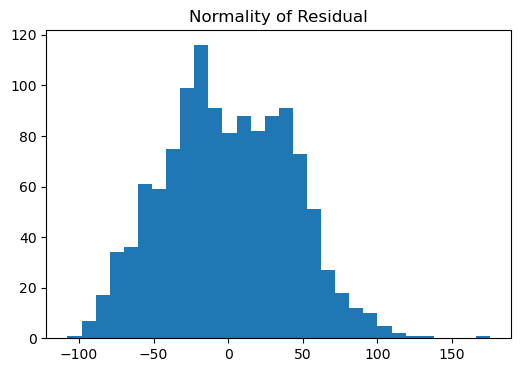

In [20]:
# Assumption 4: Normality of residual
plt.figure(figsize = (6,4))
plt.hist(residual, bins = 30)
plt.title("Normality of Residual")
plt.show()

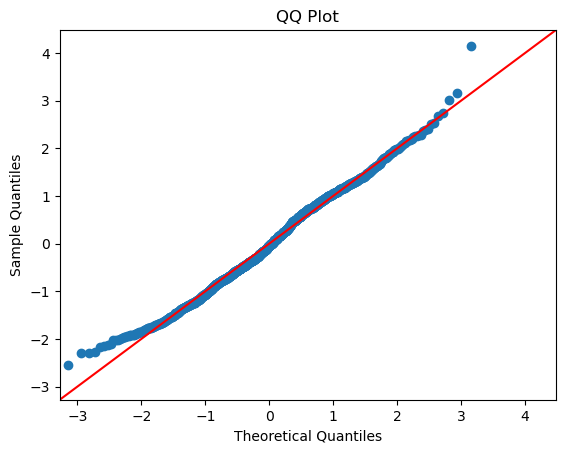

In [21]:
sm.qqplot(residual, line = '45', fit =True)
plt.title('QQ Plot')
plt.show()

In [22]:
# Assumption 5: Auto correlation using Durbin Watson Test

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residual)
dw

0.08194917069713548

In [23]:
# p value > 0.05 hence there is no auto correlation between residual

In [24]:
tickers1 = ['SBIN.NS','^NSEI']
df1 = yf.download(tickers1, start = '2025-01-01', end = '2025-04-30')['Close']
df1

[*********************100%***********************]  2 of 2 completed


Ticker,SBIN.NS,^NSEI
Date,,
2025-01-01,777.586426,23742.900391
2025-01-02,785.428955,24188.650391
2025-01-03,777.782471,24004.750000
2025-01-06,761.117126,23616.050781
2025-01-07,763.420837,23707.900391
...,...,...
2025-04-23,797.437805,24328.949219
2025-04-24,797.388794,24246.699219
2025-04-25,782.929138,24039.349609


In [25]:
df1['SBIN(t-1)'] = df1['SBIN.NS'].shift(1)
df1['^NSEI(t-1)'] = df1['^NSEI'].shift(1)
df1 = df1.dropna()
df1

Ticker,SBIN.NS,^NSEI,SBIN(t-1),^NSEI(t-1)
Date,,,,
2025-01-02,785.428955,24188.650391,777.586426,23742.900391
2025-01-03,777.782471,24004.750000,785.428955,24188.650391
2025-01-06,761.117126,23616.050781,777.782471,24004.750000
2025-01-07,763.420837,23707.900391,761.117126,23616.050781
2025-01-08,755.970459,23688.949219,763.420837,23707.900391
...,...,...,...,...
2025-04-23,797.437805,24328.949219,806.211670,24167.250000
2025-04-24,797.388794,24246.699219,797.437805,24328.949219
2025-04-25,782.929138,24039.349609,797.388794,24246.699219


In [26]:
X_test = df1['^NSEI(t-1)']
X_test = sm.add_constant(X_test)

df_result = pd.DataFrame()
df_result['Actual'] = df1['SBIN.NS']
df_result['Predicted'] = model.predict(X_test)
df_result

,Actual,Predicted
Date,,
2025-01-02,785.428955,768.672224
2025-01-03,777.782471,788.763093
2025-01-06,761.117126,780.474324
2025-01-07,763.420837,762.954851
2025-01-08,755.970459,767.094702
...,...,...
2025-04-23,797.437805,787.798533
2025-04-24,797.388794,795.086649
2025-04-25,782.929138,791.379473


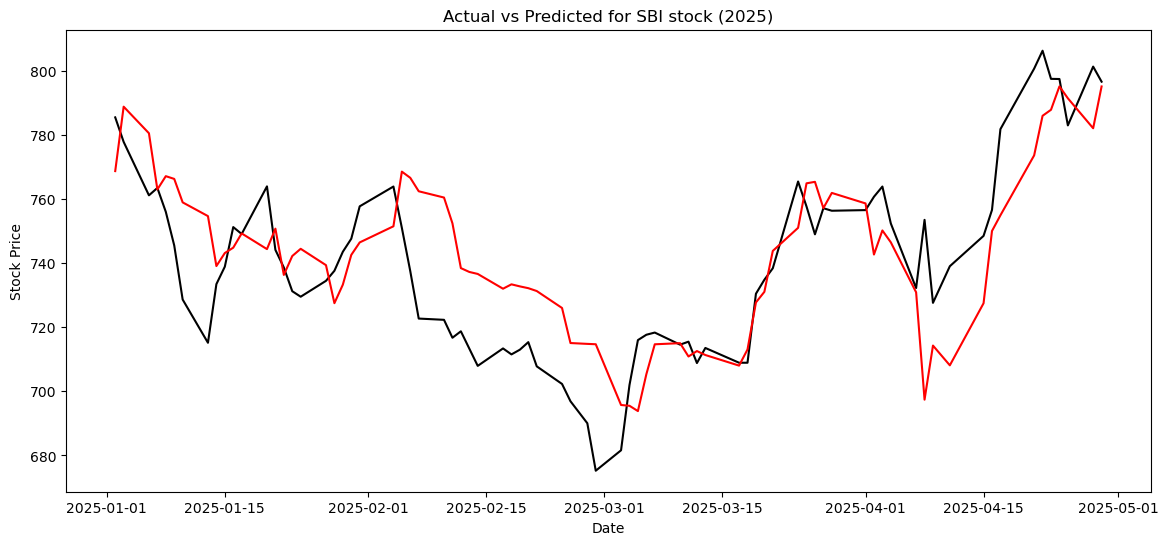

In [27]:
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Predicted for SBI stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [29]:
mse = mean_squared_error(df_result['Actual'],df_result['Predicted'])
rmse = np.sqrt(mse)
print(rmse, mse)

18.672044215931002 348.64523520168245


In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

tickers = ['SBIN.NS','TCS.NS','RELIANCE.NS','ITC.NS','^NSEI']
df = yf.download(tickers, start = '2020-01-01', end = '2025-04-30')['Close']
df

[*********************100%***********************]  5 of 5 completed


Ticker,ITC.NS,RELIANCE.NS,SBIN.NS,TCS.NS,^NSEI
Date,,,,,
2020-01-01,186.567169,687.708984,308.602600,1983.747559,12182.500000
2020-01-02,187.938400,699.416870,313.077728,1974.641357,12282.200195
2020-01-03,186.880569,700.259644,307.910553,2013.994263,12226.650391
2020-01-06,184.216446,684.019043,294.346588,2013.811279,11993.049805
2020-01-07,184.412384,694.542419,293.792999,2018.753540,12052.950195
...,...,...,...,...,...
2025-04-23,423.055176,1300.000000,797.437805,3413.000000,24328.949219
2025-04-24,422.269623,1301.599976,797.388794,3401.600098,24246.699219
2025-04-25,420.060333,1300.400024,782.929138,3448.000000,24039.349609


In [36]:
df['SBIN(t-1)'] = df['SBIN.NS'].shift(1)
df['TCS(t-1)'] = df['TCS.NS'].shift(1)
df['RELIANCE(t-1)'] = df['RELIANCE.NS'].shift(1)
df['ITC(t-1)'] = df['ITC.NS'].shift(1)
df['^NSEI(t-1)'] = df['^NSEI'].shift(1)

df['TCS_MA_5'] = df['TCS.NS'].rolling(window = 5).mean()
df['RELIANCE_MA_5'] = df['RELIANCE.NS'].rolling(window = 5).mean()
df['SBIN_MA_5'] = df['SBIN.NS'].rolling(window = 5).mean()
df['ITC_MA_5'] = df['ITC.NS'].rolling(window = 5).mean()
df['NSEI_MA_5'] = df['^NSEI'].rolling(window = 5).mean()

df['Target'] = df['SBIN.NS'].shift(-1)

df = df.dropna()
df

Ticker,ITC.NS,RELIANCE.NS,SBIN.NS,TCS.NS,^NSEI,SBIN(t-1),TCS(t-1),RELIANCE(t-1),ITC(t-1),^NSEI(t-1),TCS_MA_5,RELIANCE_MA_5,SBIN_MA_5,ITC_MA_5,NSEI_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-07,184.412384,694.542419,293.792999,2018.753540,12052.950195,294.346588,2013.811279,684.019043,184.216446,11993.049805,2000.989600,693.189392,303.546094,186.002994,12147.470117,295.084747
2020-01-08,183.511246,689.326294,295.084747,2063.963135,12025.349609,293.792999,2018.753540,694.542419,184.412384,12052.950195,2017.032715,693.512854,300.842523,185.391809,12116.040039,304.681030
2020-01-09,184.764938,705.202454,304.681030,2026.532959,12215.900391,295.084747,2063.963135,689.326294,183.511246,12025.349609,2027.411035,694.669971,299.163184,184.757117,12102.780078,306.572571
2020-01-10,186.488815,705.042969,306.572571,2025.800293,12256.799805,304.681030,2026.532959,705.202454,184.764938,12215.900391,2029.772241,695.626636,298.895587,184.678766,12108.809961,305.188507
2020-01-13,187.468246,703.243530,305.188507,2004.568115,12329.549805,306.572571,2025.800293,705.042969,186.488815,12256.799805,2027.923608,699.471533,301.063971,185.329126,12176.109961,302.651062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-22,425.755432,1291.199951,806.211670,3314.399902,24167.250000,800.623840,3321.600098,1295.500000,415.199921,24125.550781,3291.379980,1268.119995,778.723584,418.008167,23782.040234,797.437805
2025-04-23,423.055176,1300.000000,797.437805,3413.000000,24328.949219,806.211670,3314.399902,1291.199951,425.755432,24167.250000,3324.339990,1280.100000,788.516943,420.060358,23982.119922,797.388794
2025-04-24,422.269623,1301.599976,797.388794,3401.600098,24246.699219,797.437805,3413.000000,1300.000000,423.055176,24328.949219,3349.900000,1292.559985,796.682971,421.160089,24144.019922,782.929138


In [37]:
X = df[['SBIN(t-1)','TCS(t-1)','RELIANCE(t-1)','ITC(t-1)','^NSEI(t-1)','TCS_MA_5','RELIANCE_MA_5','SBIN_MA_5','ITC_MA_5','NSEI_MA_5']]
Y = df['Target']

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.05, shuffle = False)

In [45]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train,Y_train)

D:\Softwares\Jupyter Notebook\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.822e+04, tolerance: 4.648e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [46]:
coefficients = lasso.coef_
intercept = lasso.intercept_
coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficients': coefficients})
coeff_df

,Feature,Coefficients
0,SBIN(t-1),0.678756
1,TCS(t-1),-0.001991
2,RELIANCE(t-1),-0.000000
3,ITC(t-1),0.000813
4,^NSEI(t-1),0.005021
5,TCS_MA_5,-0.000000
6,RELIANCE_MA_5,0.009376
7,SBIN_MA_5,0.276540
8,ITC_MA_5,0.000000
9,NSEI_MA_5,-0.003159


In [47]:
y_pred = lasso.predict(X_test)
y_pred

array([732.32772939, 720.06205441, 732.36541931, 736.68779498,
       747.03620571, 747.72160541, 759.35587577, 744.46071498,
       740.1058645 , 734.24124776, 731.04981505, 732.87002322,
       735.8764946 , 741.67329389, 746.20134522, 739.9745995 ,
       728.53281459, 725.07256391, 718.37536375, 718.53609003,
       714.37609043, 709.87415925, 713.55291913, 712.05124323,
       713.38291262, 714.9831533 , 708.8813287 , 703.56115959,
       698.90455486, 692.48436723, 679.45154304, 683.9115908 ,
       698.58894544, 710.8921408 , 715.16245765, 717.3791097 ,
       715.04424481, 715.56745756, 710.98500066, 713.2875168 ,
       710.19635656, 712.39866537, 728.37390463, 733.45094784,
       739.17133819, 761.24045224, 756.6514167 , 750.88852385,
       757.79314069, 756.711263  , 755.49263881, 760.10090299,
       762.16460709, 752.13632111, 734.87800676, 749.80002662,
       730.47857703, 740.00492504, 749.58182016, 756.47516784,
       778.76422932, 795.90611363, 802.11972207, 798.64

In [48]:
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
Date,,
2025-01-13,733.423218,732.327729
2025-01-14,738.863953,720.062054
2025-01-15,751.215881,732.365419
2025-01-16,749.059204,736.687795
2025-01-17,763.911011,747.036206
...,...,...
2025-04-22,797.437805,795.906114
2025-04-23,797.388794,802.119722
2025-04-24,782.929138,798.641442


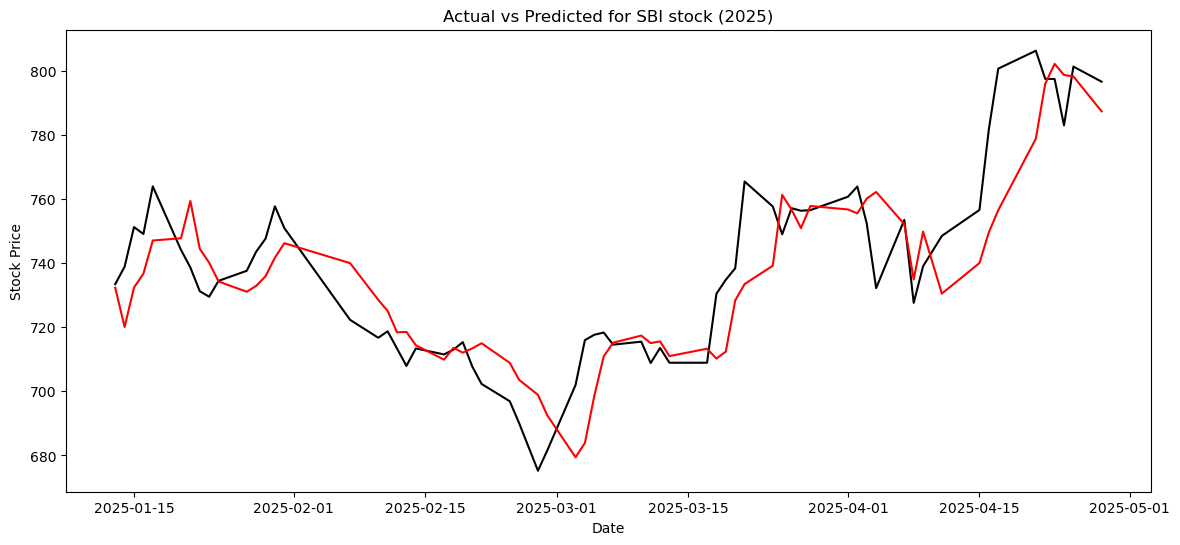

In [49]:
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Predicted for SBI stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [50]:
r2 = r2_score(Y_test,y_pred)
print("R square",r2)

mse = mean_squared_error(Y_test,y_pred)
print("mse", mse)

rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7473569266289221
mse 224.08096469691486
rmse 14.969334143405138


In [51]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha =10)
ridge.fit(X_train,Y_train)

Ridge(alpha=10)

In [53]:
coefficients_1 = ridge.coef_
coefficients_1
intercept_1 =ridge.intercept_
intercept_1

coeff1_df = pd.DataFrame({'Feature':X.columns, 'Coefficients': coefficients_1})
coeff1_df

,Feature,Coefficients
0,SBIN(t-1),0.478413
1,TCS(t-1),-0.005450
2,RELIANCE(t-1),-0.063101
3,ITC(t-1),-0.082932
4,^NSEI(t-1),0.012035
5,TCS_MA_5,0.004040
6,RELIANCE_MA_5,0.074304
7,SBIN_MA_5,0.483847
8,ITC_MA_5,0.086125
9,NSEI_MA_5,-0.010722


In [54]:
y1_pred = ridge.predict(X_test)
y1_pred

array([734.22071165, 722.36955347, 731.85429442, 734.94185624,
       744.95914506, 744.85196845, 755.70727612, 745.06858366,
       741.56456183, 736.83686504, 732.75319288, 732.51923329,
       735.48406323, 741.80225918, 745.63130496, 740.78539178,
       732.5566842 , 726.688152  , 719.30223877, 718.69225571,
       715.08716258, 710.33167913, 712.55997564, 711.56441865,
       712.84546292, 713.91830449, 708.60656842, 703.35741422,
       699.47433131, 693.28637411, 680.60694891, 685.11652168,
       696.80691434, 707.57022811, 712.6122421 , 714.25184097,
       713.99852986, 714.63903397, 710.8978949 , 711.84353655,
       710.59423839, 714.96160704, 727.06921377, 731.46897115,
       738.53685603, 756.62826282, 755.12741443, 751.48670329,
       757.51315106, 756.00352383, 754.21600152, 759.58270696,
       760.65251746, 752.92072691, 737.14097001, 747.85278536,
       731.69849788, 739.24611574, 749.48408372, 755.78228507,
       775.41087636, 791.62152666, 798.02509772, 798.24

In [55]:
df1_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y1_pred})
df1_result

,Actual,Predicted
Date,,
2025-01-13,733.423218,734.220712
2025-01-14,738.863953,722.369553
2025-01-15,751.215881,731.854294
2025-01-16,749.059204,734.941856
2025-01-17,763.911011,744.959145
...,...,...
2025-04-22,797.437805,791.621527
2025-04-23,797.388794,798.025098
2025-04-24,782.929138,798.243806


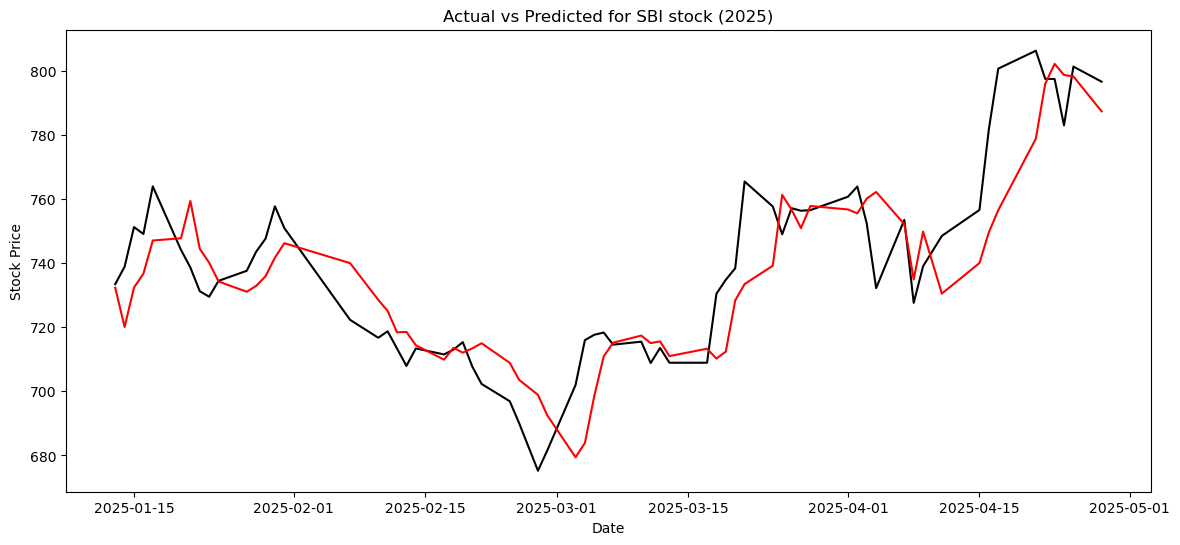

In [56]:
plt.figure(figsize = (14,6))
plt.plot(df1_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df1_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Predicted for SBI stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [57]:
r2 = r2_score(Y_test,y1_pred)
print("R square",r2)

mse = mean_squared_error(Y_test,y1_pred)
print("mse", mse)

rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7432478486548557
mse 227.72549824441185
rmse 15.090576471573637


In [64]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 10, l1_ratio = 0.5)
elastic_net.fit(X_train,Y_train)

D:\Softwares\Jupyter Notebook\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.201e+04, tolerance: 4.648e+03
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=10)

In [65]:
coefficients_2 = elastic_net.coef_
coefficients_2
intercept_2 = elastic_net.intercept_
intercept_2
coeff2_df = pd.DataFrame({'Feature':X.columns, 'Coefficients': coefficients_2})
coeff2_df

,Feature,Coefficients
0,SBIN(t-1),0.652275
1,TCS(t-1),-0.001401
2,RELIANCE(t-1),-0.007202
3,ITC(t-1),0.003735
4,^NSEI(t-1),0.006720
5,TCS_MA_5,-0.000000
6,RELIANCE_MA_5,0.017214
7,SBIN_MA_5,0.305363
8,ITC_MA_5,0.000000
9,NSEI_MA_5,-0.005156


In [66]:
y2_pred = elastic_net.predict(X_test)
y2_pred

array([732.53562166, 720.08898476, 732.0991898 , 736.39264264,
       746.74481022, 747.33615828, 758.93770796, 744.28722974,
       740.26787008, 734.62727975, 731.33885054, 732.57513312,
       735.61199363, 741.68287977, 746.15749885, 739.91952372,
       728.70866955, 724.95975931, 717.92859377, 718.09629103,
       714.12399712, 709.67126154, 713.18538809, 711.70613906,
       712.99909513, 714.5177548 , 708.53427342, 703.02417489,
       698.54857671, 692.29644207, 678.92676432, 683.53300691,
       697.8416875 , 710.30895691, 714.83211411, 716.91375361,
       714.64067656, 715.16720813, 710.71675699, 712.78392785,
       709.86866987, 712.54643717, 727.88326674, 733.01592815,
       738.84026839, 760.59667388, 756.28126853, 750.49096633,
       757.37069238, 756.25062112, 754.64447294, 759.58117575,
       761.48837555, 751.66621079, 734.05829195, 749.04280975,
       730.11366024, 739.69515241, 749.47160245, 756.14996599,
       778.14946168, 795.07242677, 801.24302344, 798.26

In [67]:
df2_result = pd.DataFrame({'Actual': Y_test, 'Predicted': y2_pred})
df2_result

,Actual,Predicted
Date,,
2025-01-13,733.423218,732.535622
2025-01-14,738.863953,720.088985
2025-01-15,751.215881,732.099190
2025-01-16,749.059204,736.392643
2025-01-17,763.911011,746.744810
...,...,...
2025-04-22,797.437805,795.072427
2025-04-23,797.388794,801.243023
2025-04-24,782.929138,798.268383


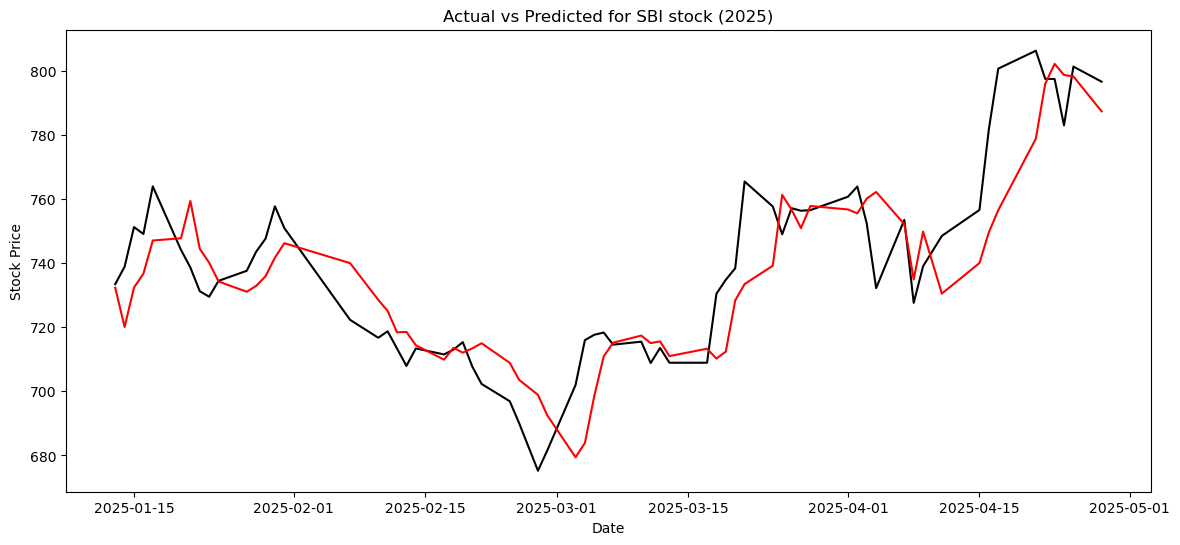

In [68]:
plt.figure(figsize = (14,6))
plt.plot(df2_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df2_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Predicted for SBI stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [69]:
r2 = r2_score(Y_test,y2_pred)
print("R square",r2)

mse = mean_squared_error(Y_test,y2_pred)
print("mse", mse)

rmse = np.sqrt(mse)
print("rmse", rmse)

R square 0.7456593064053925
mse 225.58666351660415
rmse 15.019542719956695
